SAPCE PCE

In [3]:
import itertools
import math
import numpy as np
import UQpy
from scipy.special import comb
from UQpy.distributions import Uniform,Normal, JointIndependent
from UQpy.surrogates.polynomial_chaos import TotalDegreeBasis, LeastSquareRegression
from UQpy.sensitivity import PceSensitivity
from UQpy.sampling import MonteCarloSampling
from sklearn.metrics import mean_squared_error, r2_score
import time  
import scipy as sp
import random
import matplotlib.pyplot as plt

import SAPCE

In [4]:
def root_mean_squared_error(y_true, y_pred, multioutput='uniform_average'):
    mse = mean_squared_error(y_true, y_pred, multioutput=multioutput)
    if isinstance(mse, np.ndarray):
        return np.sqrt(mse)
    return np.sqrt(mse)


In [5]:
import pandas as pd
data = pd.read_csv('Oakwood.csv', sep=';', header=0)
data_NVM= pd.read_csv('Oakwood_NVM.csv', sep=';', header=0)

names=data.columns.tolist()
data_array=data.to_numpy()

names_NVM=data_NVM.columns.tolist()
data_array_NVM=data_NVM.to_numpy()

In [6]:
X=data_array[:,:12]
Y_all=data_array[:,12:]
Y_tunnel=data_array[:,12:23]
Y_surface=data_array[:,23:]

Y_all_NVM=data_array_NVM[:,12:]

Y_N=Y_all_NVM[:,:113]
Y_V=Y_all_NVM[:,113:226]
Y_M=Y_all_NVM[:,226:]

In [7]:
Y_all.shape

(1000, 23)

In [8]:
# Concrete parameters
dist_Ec=Normal(13,1)
dist_Relax=Uniform(30,40)

# Soil1
dist_S1_Erel=Uniform(2,1)
dist_S1_E50=Normal(65,5)
dist_S1_c=Normal(30,5)
dist_S1_theta=Normal(30,1)
dist_S1_ko=Uniform(0.6,0.5)

# Soil2
dist_S1_Erel=Uniform(2,1)
dist_S1_E50=Normal(130,10)
dist_S1_c=Normal(5,1)
dist_S1_theta=Normal(42,1)
dist_S1_ko=Uniform(0.45,0.2)


marg = [dist_Ec,dist_Relax, dist_S1_Erel, dist_S1_E50, dist_S1_c,dist_S1_theta,dist_S1_ko,dist_S1_Erel,dist_S1_E50,dist_S1_c,dist_S1_theta,dist_S1_ko]
joint = JointIndependent(marginals=marg)

0
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1295.0576193200748


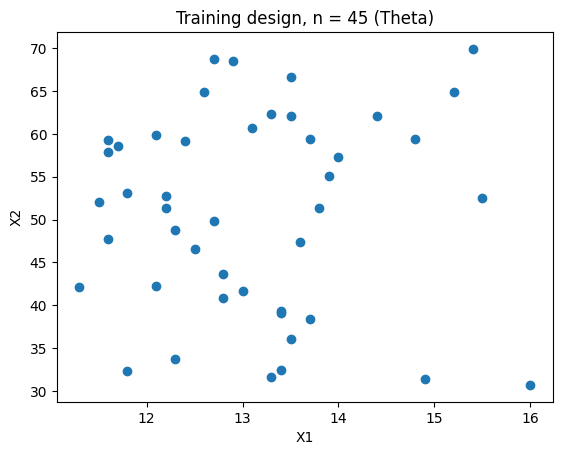

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1295.0576193200748
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1288.1878098592683
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1272.1976650518557
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1271.966270080999
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1104.6767710417848
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1092.6359013838098
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1091.981918647209
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1090.7083028547452
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1075.191281482338
Adaptive basis construction ter

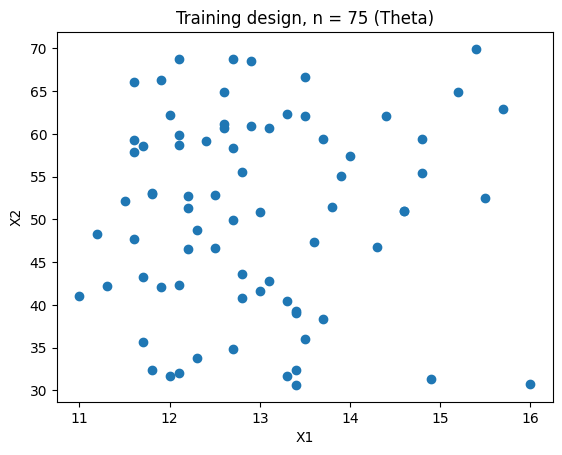

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1017.3122573273837
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1034.2587417222535
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1035.1124560261794
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1018.892577808886
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1010.2097020469215
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1008.3856407900585
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1029.2512583366617
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1001.1574616989113
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1006.7854223291652
Adaptive basis construction t

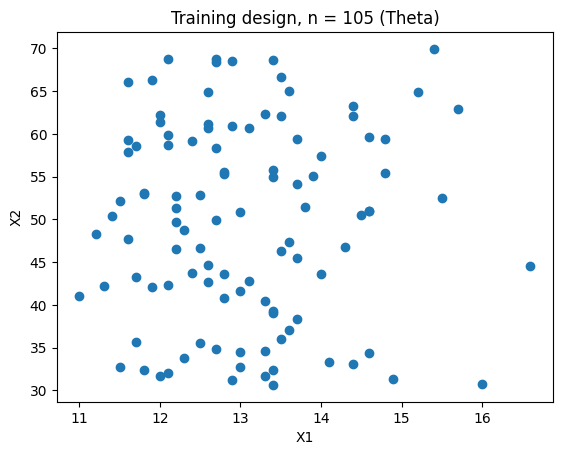

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1035.0229776410242
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1032.3044368177523
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1002.5884441244115
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1004.9017092855117
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1031.8222564127466
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1002.784738952976
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1037.101946376432
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1033.0100529675826
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1006.1689606217802
Adaptive basis construction te

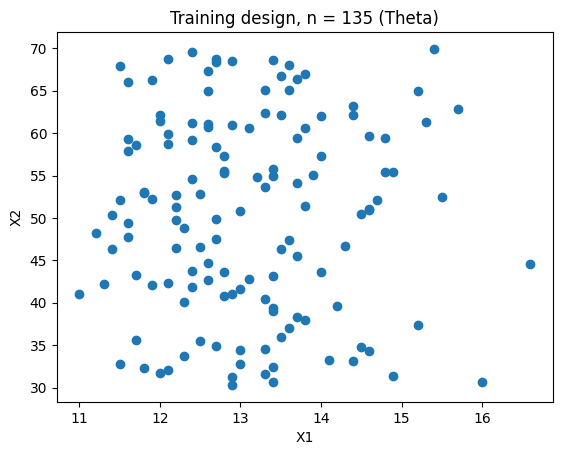

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1040.8034706158392
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1039.9159045223137
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1043.2375846032728
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1037.866109331088
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1017.2089868008005
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1015.8913486657873
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1014.6737787318971
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1018.4434203009108
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1005.1890708766194
Adaptive basis construction t

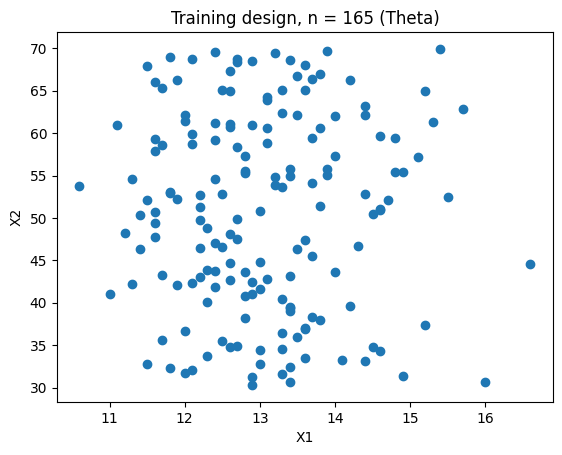

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1027.2569925512046
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1034.8187106544897
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1034.4078232468046
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1034.6159161634196
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1035.6854585669673
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1036.41173512467
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1041.8533778500425
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1042.744532961734
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1034.3477797868466
Adaptive basis construction ter

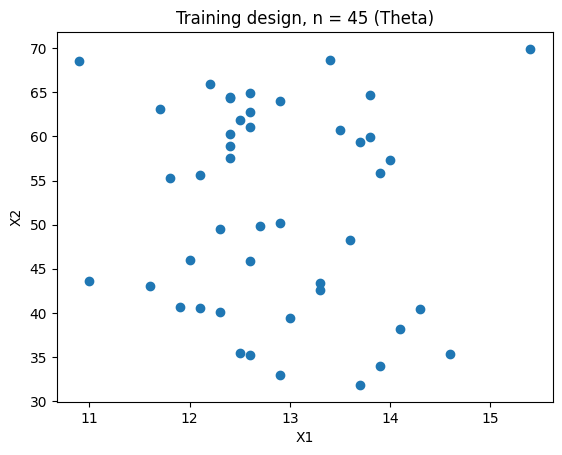

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1402.4111695079403
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1316.8103388062327
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1256.2874899987485
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1222.2479574714557
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1216.2211908244055
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1207.9673138738228
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1201.0132629826962
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1200.7317158940134
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1199.2595213426273
Adaptive basis construction 

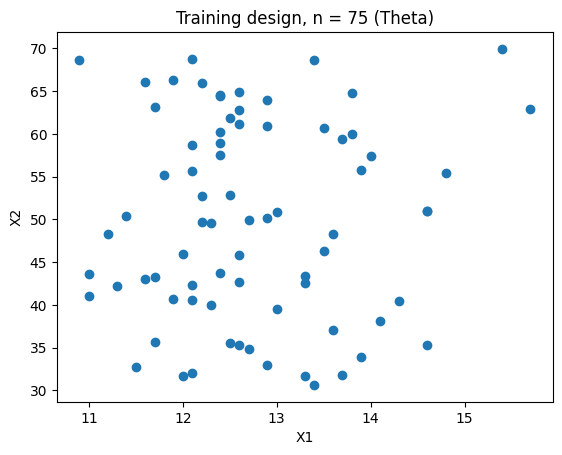

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1002.5662078854629
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1018.1625676727118
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1006.6782555345148
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1003.257056956095
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1013.1413334206172
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1003.0220512569778
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1015.4416005226751
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1016.0592049171688
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1013.0630936421398
Adaptive basis construction t

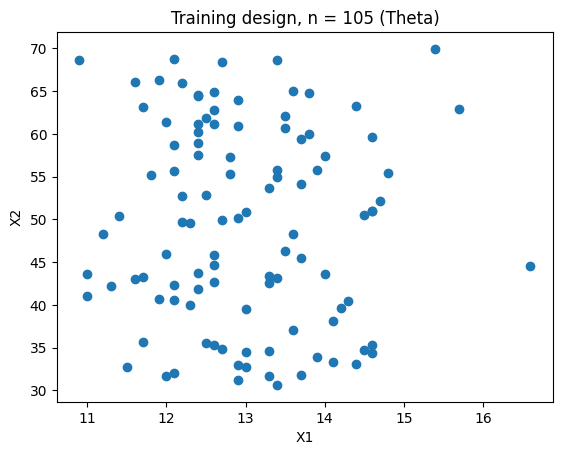

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1109.6785986029831
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1101.2616014206192
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1103.4337089035348
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1106.8613883278229
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1120.6944175025778
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1121.5865265821517
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1125.1261114386891
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1129.1397595541794
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1096.2376444993015
Adaptive basis construction 

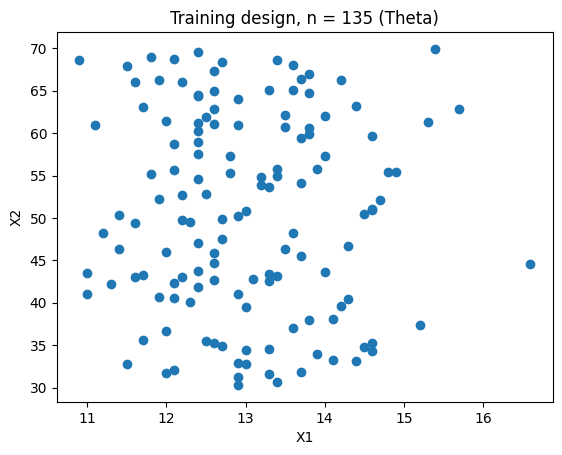

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1069.931240283139
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1054.9056621771779
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1065.6515009471796
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1063.396273555374
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1076.171525997423
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1069.307956472181
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1071.3224794622372
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1080.7166627629042
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1088.0733185240813
Adaptive basis construction term

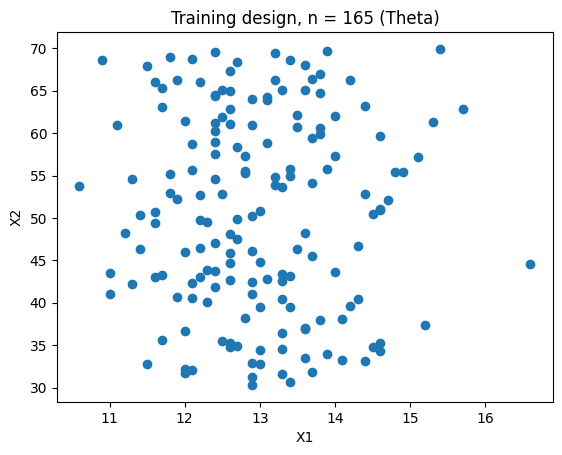

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1077.9432793487779
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1076.881608355477
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1083.3891403099149
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1082.4175606799986
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1073.044384919864
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1075.2133724413318
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1068.1970372535156
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1068.0453863081177
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1071.608422081358
Adaptive basis construction ter

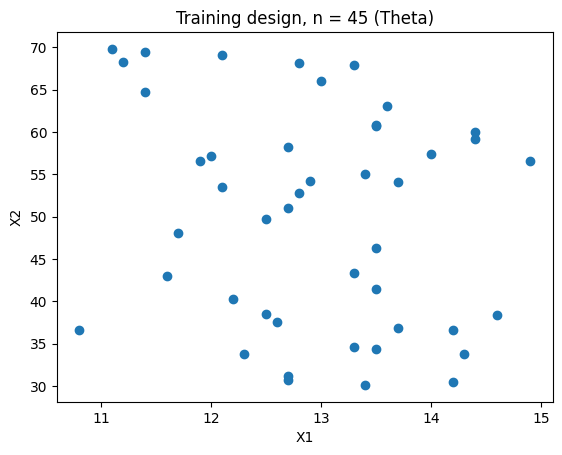

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1665.0895536298797
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1653.2003995954362
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1653.4978142372852
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1649.9467936935573
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1611.3139326439662
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1382.8885107720664
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1381.3247544651244
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1374.4547799294428
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1371.6767605269902
Adaptive basis construction 

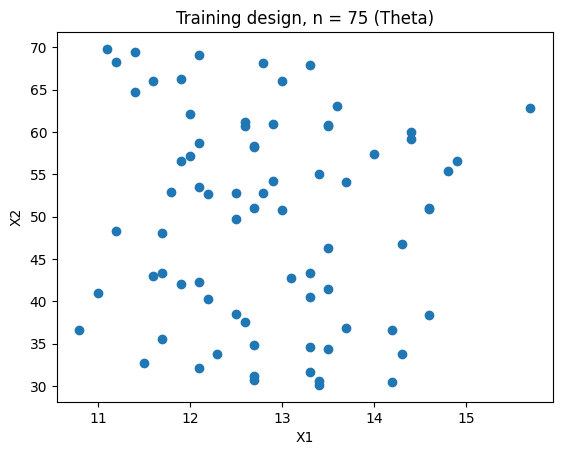

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1005.4668126839969
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1003.007048904813
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1001.2713692166518
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1001.2521725091214
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1001.3995409418677
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1001.783962681415
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1014.0856709912485
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1009.8690123756816
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1010.4301170367323
Adaptive basis construction te

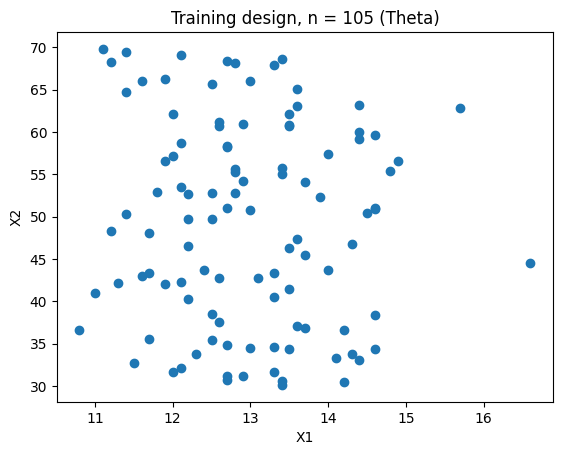

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1012.2839234737534
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1016.6196474412103
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1020.0726713697995
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1035.516922366072
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1038.4532803906786
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1043.882732396301
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1062.7542755083116
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1041.1607827219364
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1038.9676212776935
Adaptive basis construction te

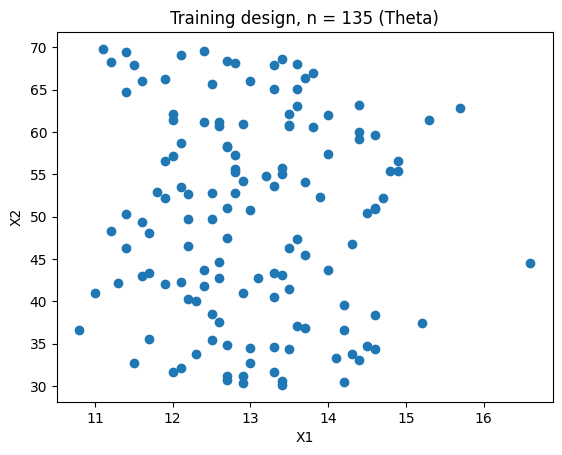

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1078.9819571687144
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1084.0766163740393
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1080.582929070097
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1079.2033821339282
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1080.2070792468107
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1082.107351826448
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1074.8067128932535
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1047.8863897951655
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1044.9386678014782
Adaptive basis construction te

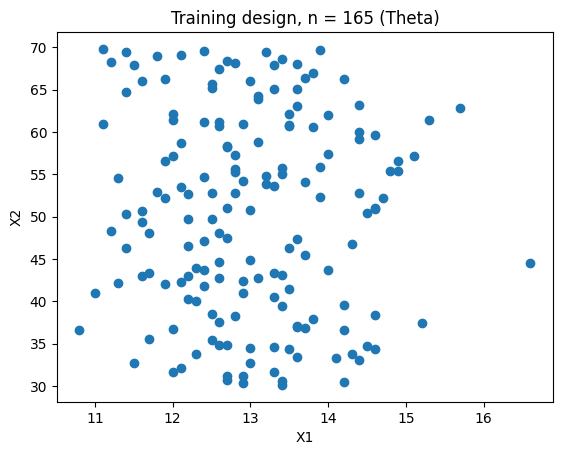

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1047.6942406635296
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1047.6171052466182
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1055.3663812160878
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1057.3859077121506
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1063.8482260286196
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1065.3261060275918
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1064.9194930862757
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1065.2690019420293
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1066.0523011742252
Adaptive basis construction 

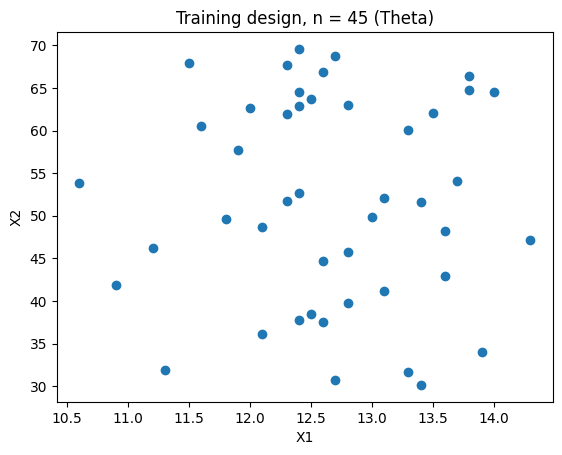

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1617.2759930548966
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1452.3996247483876
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1447.9332579807124
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1350.3706968608653
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1284.1146453018778
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1246.7065386721035
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1222.7004636056809
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1223.5106548377116
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1188.1884261505138
Adaptive basis construction 

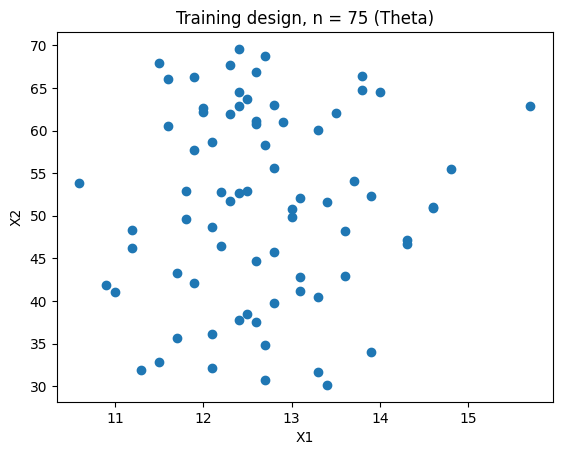

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1035.9735868031635
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1036.1022363210868
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1026.659178148658
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1010.6886981476816
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1085.9873222242875
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1079.0125954165292
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1028.7862077299399
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1009.0553794164434
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1000.8566531329328
Adaptive basis construction t

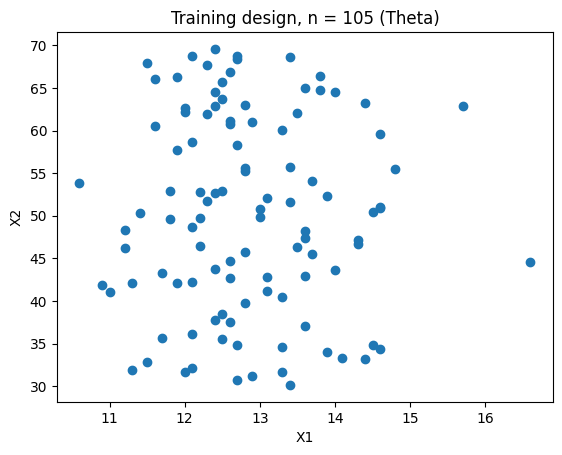

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1047.9231894175737
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1037.316631534377
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1030.9237264439673
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1034.3518479262725
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1008.3582115044026
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1011.8496617060076
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1002.1293846728656
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1022.3182252304083
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1017.2360442247834
Adaptive basis construction t

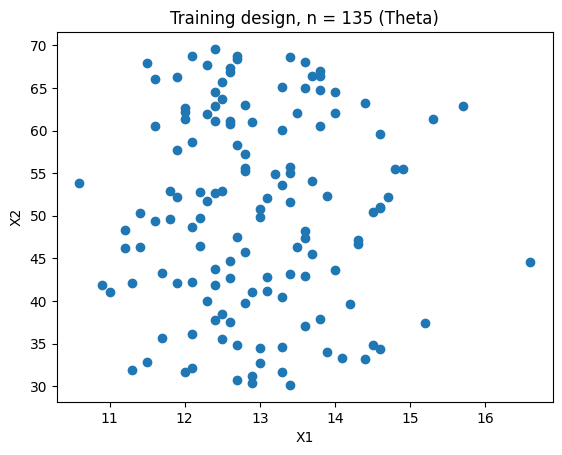

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1008.0699314125402
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1008.1377056356358
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1007.265759543841
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1010.2227510592459
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1003.6852169493428
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1018.5399336876359
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1018.2478827954691
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1010.1822005074459
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1009.8014841366928
Adaptive basis construction t

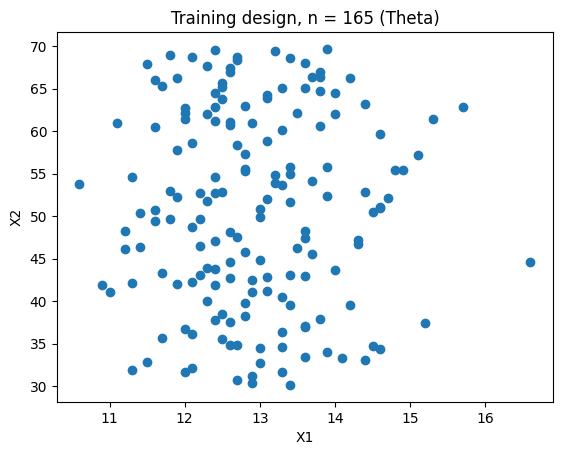

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1010.2463755713894
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1004.9738616937884
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1006.0597258098833
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1006.0844466422839
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1007.5832953533478
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1002.8007562303012
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1004.8015371894928
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1010.0581614563621
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1002.5953806199121
Adaptive basis construction 

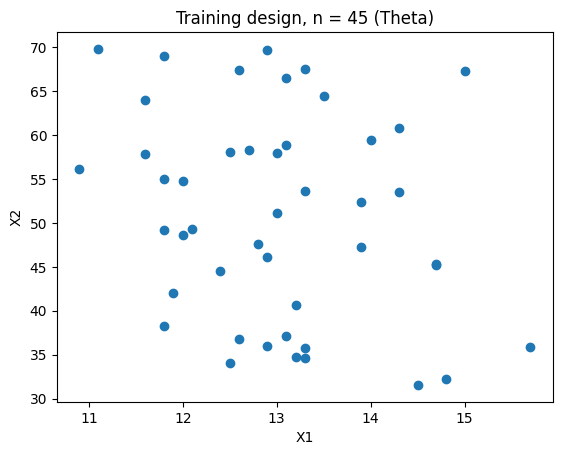

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1254.2054132730123
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1245.7809262864155
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1245.6450732994315
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1243.895186972674
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1171.2088337253265
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1162.8687502178561
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1135.889012326011
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1135.4353130980305
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1129.7547040908314
Adaptive basis construction te

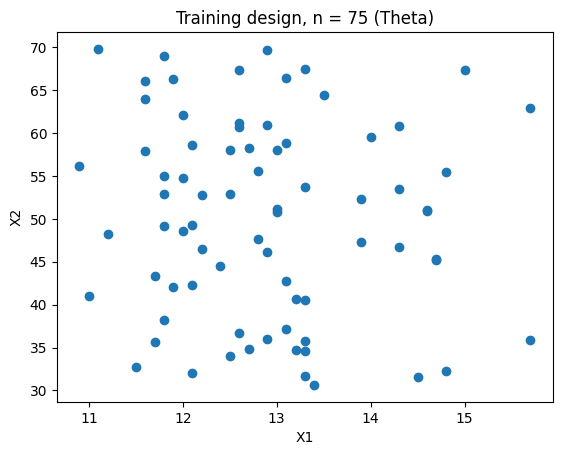

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1010.2213935957514
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1021.7447317115013
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1020.6110833624872
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1002.0971282764102
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1003.2055663364774
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1046.0872495478673
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 11526.694359035046
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 10569.282799035838
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 10563.548307379779
Adaptive basis construction 

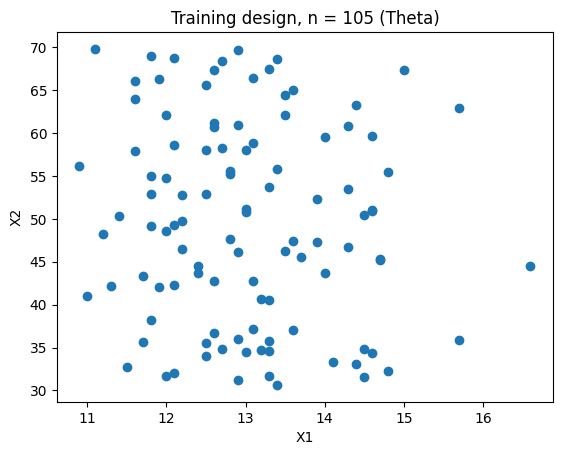

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 8778.837472436368
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 8763.700882023239
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 8813.487755972563
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1015.7415859133446
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1022.8547284500117
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1007.9583603287638
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1009.7985605015363
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1015.893781801372
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1015.5429040442478
Adaptive basis construction term

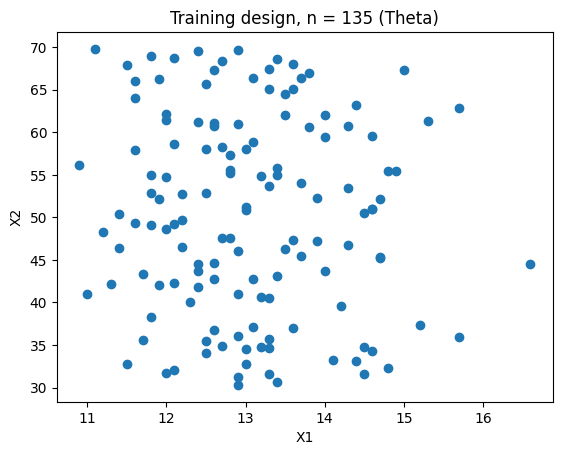

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1030.033328616124
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1002.9161396150172
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1000.2700850624232
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1001.4497360048678
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1002.7993916655967
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1021.6686908553806
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1004.1767319073598
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1000.3642706841592
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1003.4330819854398
Adaptive basis construction t

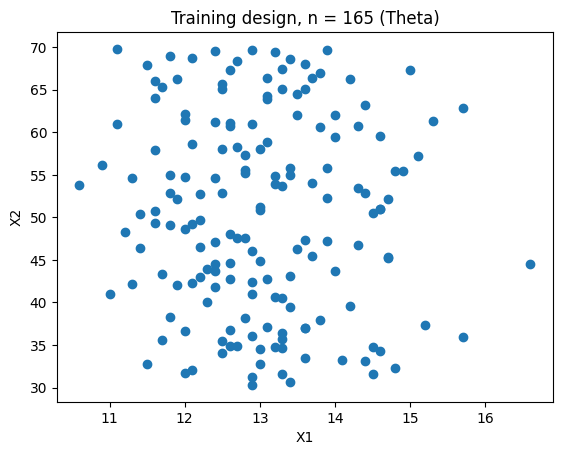

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1004.2941298620606
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1014.0997575431097
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1017.1958430646313
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1016.6545539795867
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1018.8291271149518
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1025.4365930326223
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1020.5146279701885
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1014.6326979698451
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1013.021897037006
Adaptive basis construction t

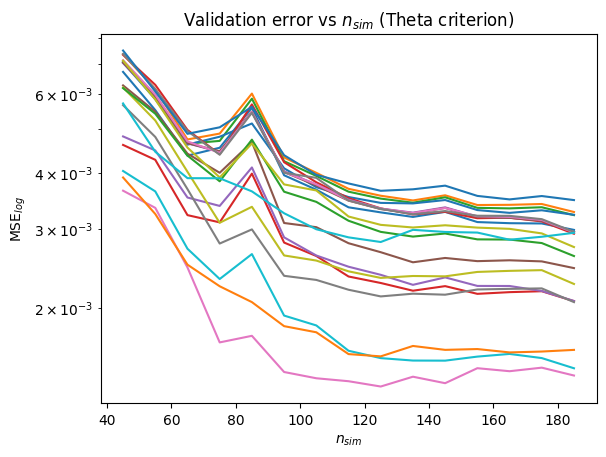

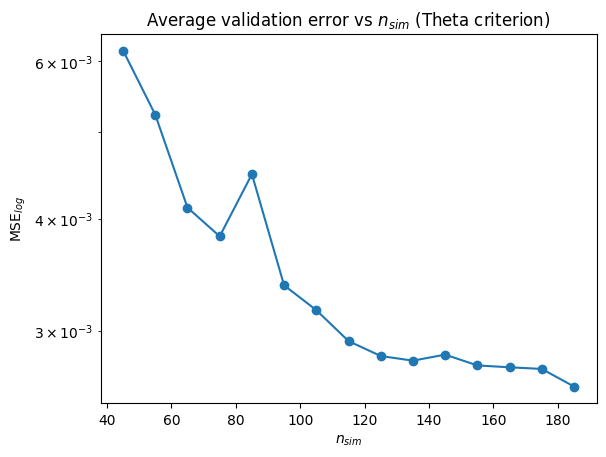

In [9]:
import numpy as np          
import matplotlib.pyplot as plt  
import random               
from UQpy.sampling import ThetaCriterionPCE  

errs_stat = []              # sukládám chyby běhů
nsim_values = None          # počet simulací

for s in range(5):          # opakování experimentu pětkrát
    print(s)                
    errs = []               # chyby pro tento běh
    nsim = []               # počty vzorků 

    base_n = 45             # počáteční počet vzorků
    n_steps = 15            # počet adaptivních kroků
    increment = 10          # kolik bodů přidávám

    all_indices = np.arange(len(Y_all))  # všechny indexy dat
    initial_indices = random.sample(list(all_indices), base_n)  # náhodný výběr startu
    remaining_indices = [idx for idx in all_indices if idx not in initial_indices]  # zbylé indexy

    Xadapted = X[initial_indices, :]      # počáteční X trénovací data
    Yadapted = Y_all[initial_indices, :]  # počáteční Y trénovací data

    for k in range(n_steps):             # adaptivní kroky vzorkování
        if k > 0:                      
            for _ in range(increment):   # přidání nových bodů
                if not remaining_indices:  # když dojdou indexy, končím
                    break

                sapce = SAPCE.SensitivityAdaptivePCE(  
                    pdf=joint,                       
                    exp_design_in=Xadapted,            
                    exp_design_out=Yadapted,           
                    max_partial_degree=5,              
                    num_inputs=12,                   
                )
                sapce.construct_adaptive_basis(max_condition_number=1e3)  # adaptivní báze PCE
                sapce.construct_pruned_pce(cr=1e-8)                      # ořezání malých členů

                X_candidates = X[remaining_indices, :]  # kandidátní body k výběru

                ThetaSampling = ThetaCriterionPCE([sapce.pce])  # Theta vzorkování
                pos = ThetaSampling.run(Xadapted, X_candidates)  # najdu nejlepší kandidát

                new_idx = remaining_indices[int(pos)]  # nový vybraný index

                Xadapted = np.vstack([Xadapted, X[new_idx, :]])      # rozšířím X trénovací
                Yadapted = np.vstack([Yadapted, Y_all[new_idx, :]])  # rozšířím Y trénovací

                remaining_indices.remove(new_idx)  # smažu použitý index

        n_current = Xadapted.shape[0]   # aktuální velikost designu
        nsim.append(n_current)          # uložím počet vzorků

        val_indices = np.array(         # indexy validačních bodů
            [
                idx for idx in all_indices
                if idx not in np.unique(np.where((X == Xadapted[:, None]).all(-1))[1])
            ],
            dtype=int
        )

        xx_train = Xadapted             # trénovací vstupy
        yy_train = Yadapted             # trénovací výstupy

        xx_val = X[val_indices, :]      # validační vstupy
        yy_val = Y_all[val_indices, :]  # validační výstupy

        sapce = SAPCE.SensitivityAdaptivePCE(  # znovu sestavím PCE model
            pdf=joint,
            exp_design_in=xx_train,
            exp_design_out=yy_train,
            max_partial_degree=5,
            num_inputs=12,
        )
        sapce.construct_adaptive_basis(max_condition_number=1e3)  # adaptivní báze znovu
        sapce.construct_pruned_pce(cr=1e-8)                      # ořezání členů znovu

        errs.append(sapce.pce.validation_error(xx_val, yy_val))  # spočtu validační chybu
#Vizualizace
        if k % 3 == 0:                    
            fig_vis, ax_vis = plt.subplots() 
            ax_vis.scatter(xx_train[:, 0], xx_train[:, 1])  
            ax_vis.set_xlabel("X1")        
            ax_vis.set_ylabel("X2")      
            ax_vis.set_title(f"Training design, n = {n_current} (Theta)") 
            plt.show()                     

    errs_stat.append(errs)     
    nsim_values = nsim          

nsim = nsim_values              
errs_stat_array = np.array(errs_stat)  
fig, ax = plt.subplots()       

for i in range(21):           
    ax.plot(
        nsim,
        np.mean(errs_stat_array[:, :, 2 + i], axis=0)  
    )

ax.set_yscale("log")            
ax.set_ylabel("MSE$_{log}$")    
ax.set_xlabel("$n_{sim}$")      
ax.set_title("Validation error vs $n_{sim}$ (Theta criterion)")  
plt.show()                      

mean_err_all = np.mean(errs_stat_array[:, :, 2:2 + 21], axis=(0, 2))  

fig_avg, ax_avg = plt.subplots()  
ax_avg.plot(nsim, mean_err_all, marker="o") 
ax_avg.set_yscale("log")          
ax_avg.set_ylabel("MSE$_{log}$")  
ax_avg.set_xlabel("$n_{sim}$")    
ax_avg.set_title("Average validation error vs $n_{sim}$ (Theta criterion)") 
plt.show()                   

nsim_theta = nsim.copy()         
mean_err_theta = mean_err_all.copy()  


0
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1559.389738395001


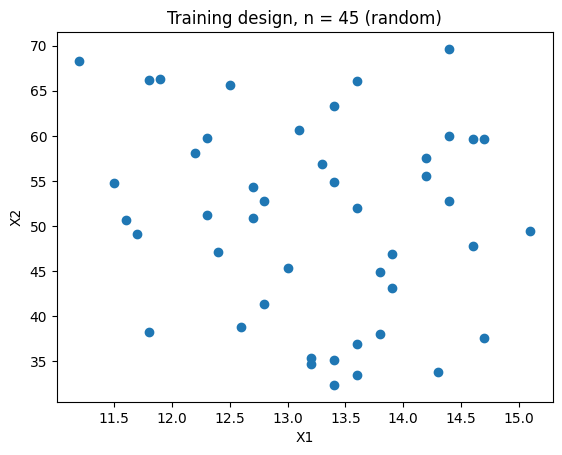

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1217.8526528298617
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1236.1991251372156
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1279.4915298598326


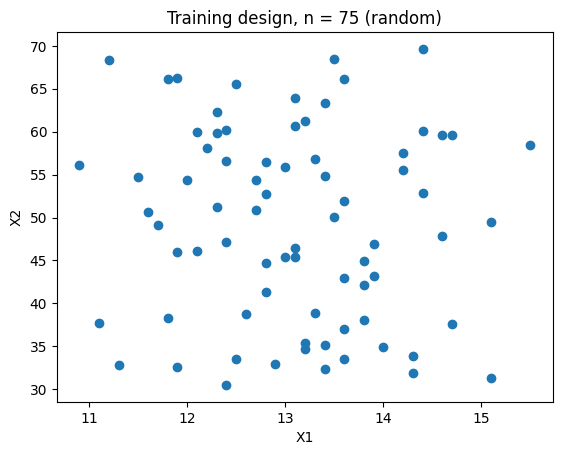

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1306.0258178760237
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1239.5925559251616
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1275.4904470105243


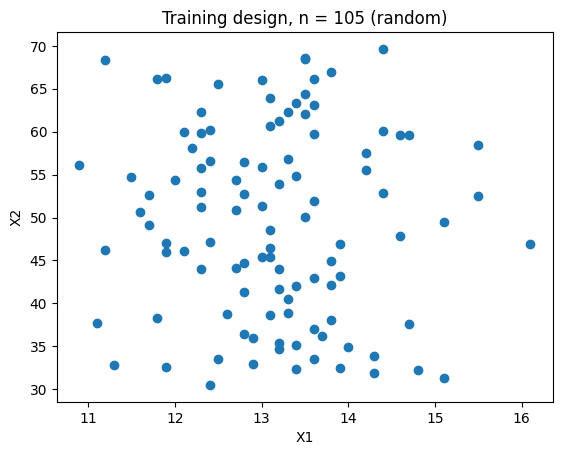

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1221.4976113473926
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1241.0431504785322
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1238.1168877964142


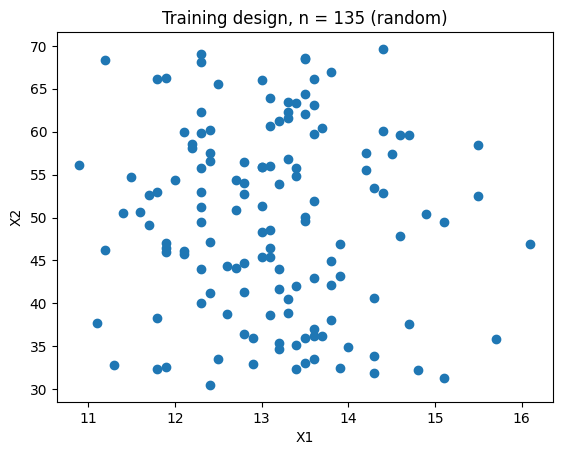

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1221.1590095256147
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1223.1410494315062
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1211.8649017599728


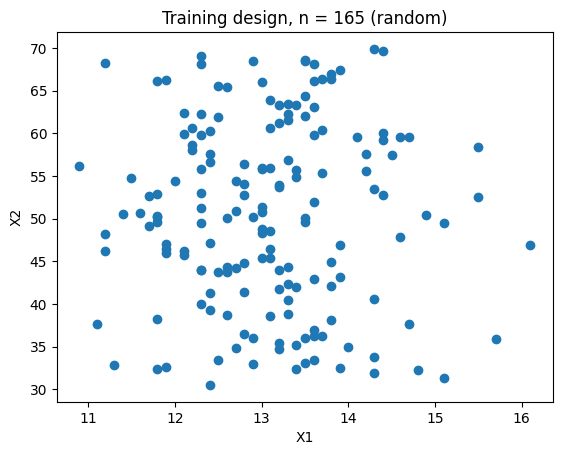

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1181.4517378947019
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1114.9822860035324
1
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1541.5535445398166


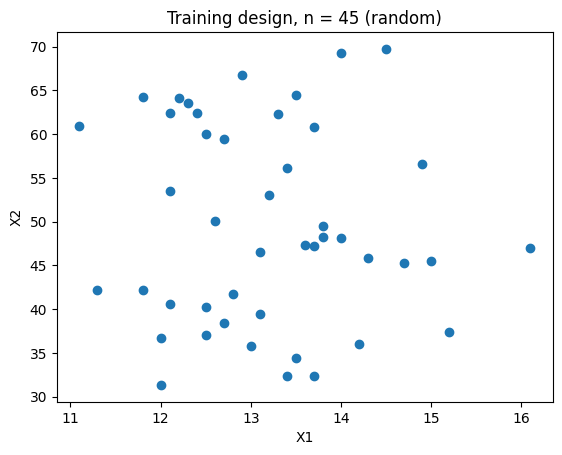

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1347.7160870322064
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1133.211254404705
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1158.769908117329


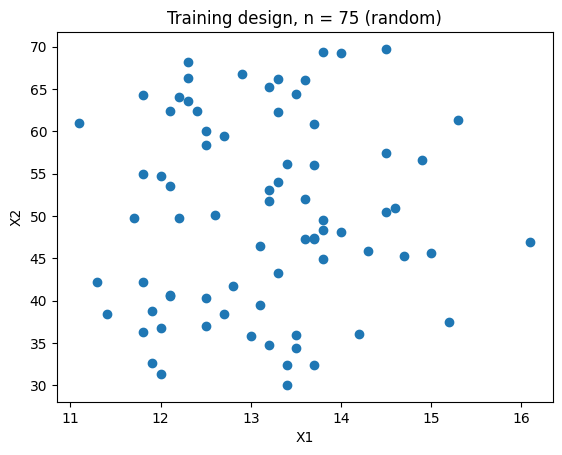

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1173.831303271531
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1158.6259269120446
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1155.963760393775


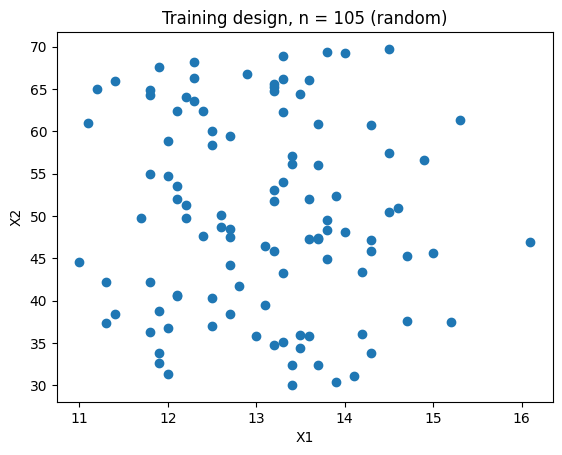

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1153.443921983678
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1104.5344652885624
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1090.9678030008363


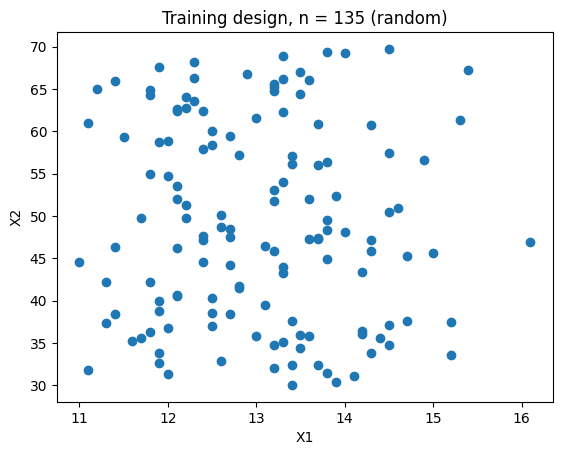

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1103.3607220272982
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1094.100043228372
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1114.7163759619575


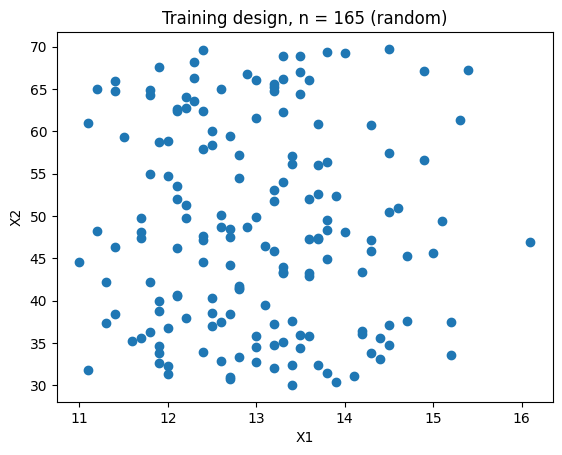

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1103.6424639123586
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1092.6531168135568
2
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1336.1133021172375


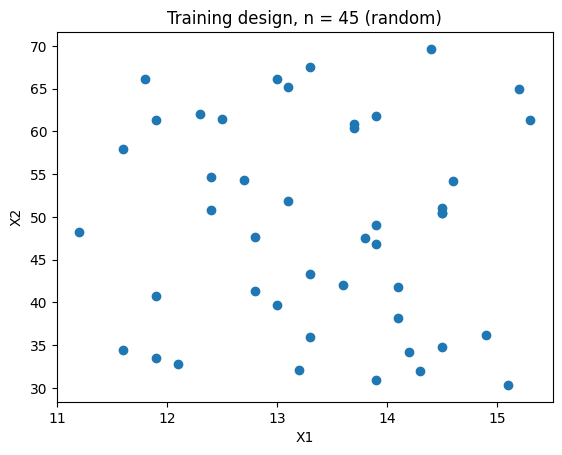

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1403.7283186727825
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1321.514985996845
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1231.693187386009


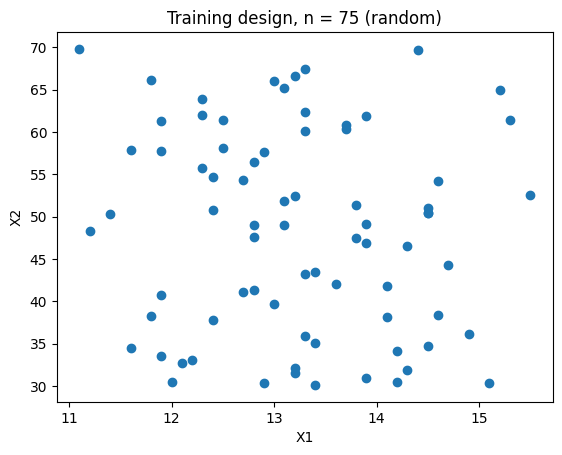

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1128.3372086014567
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1140.849615869085
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1197.650798935621


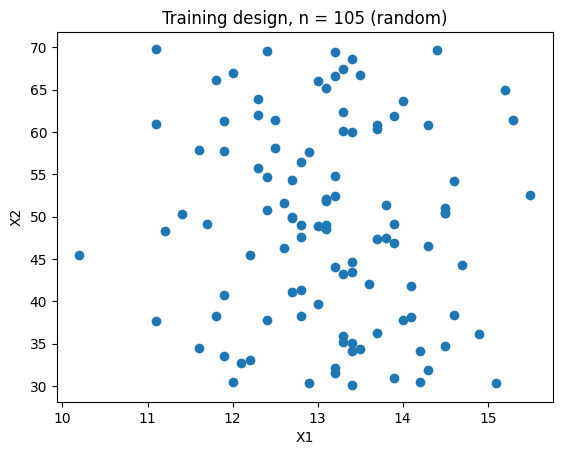

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1189.249117179578
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1206.234100134285
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1226.2019243810616


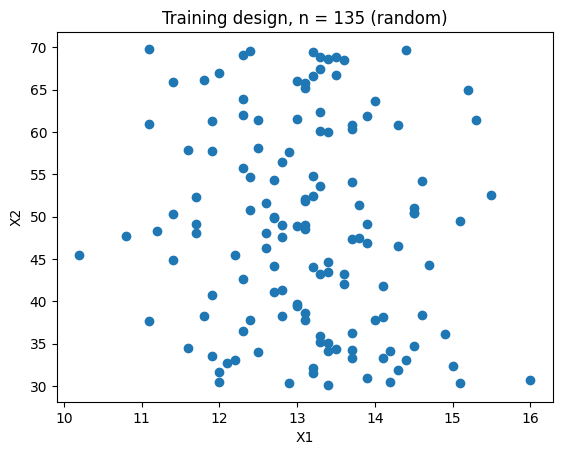

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1230.97213948986
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1225.2322267895177
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1214.267945805349


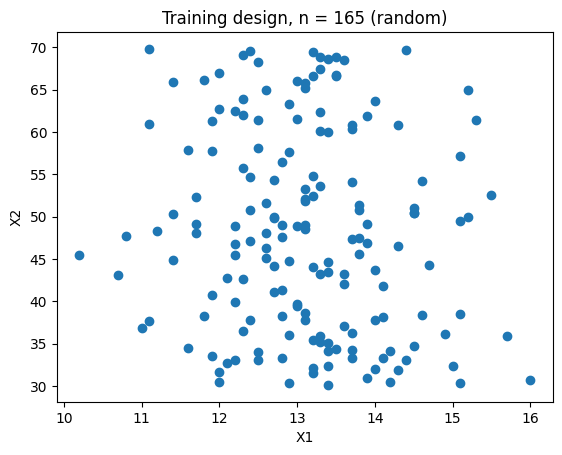

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1202.8944650804476
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1188.2053516149329
3
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1603.53531974504


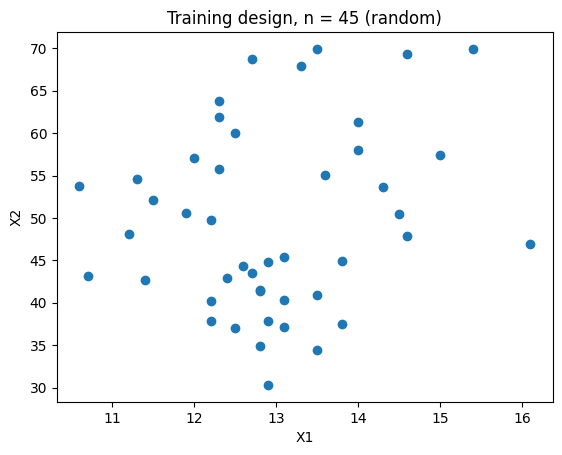

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1418.1377855444482
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1231.7365867586605
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1268.1663579360252


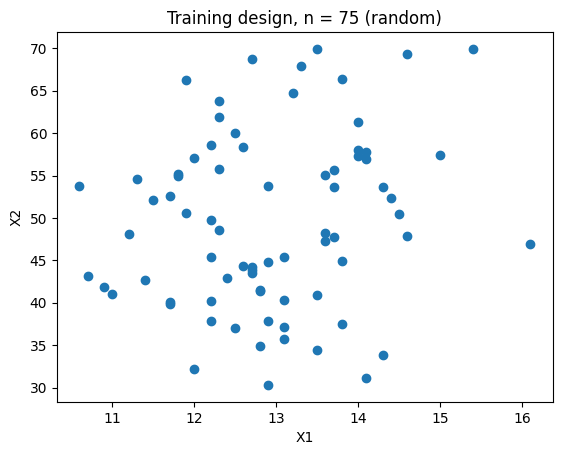

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1231.715656217217
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1251.0558907865575
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1276.4155133885915


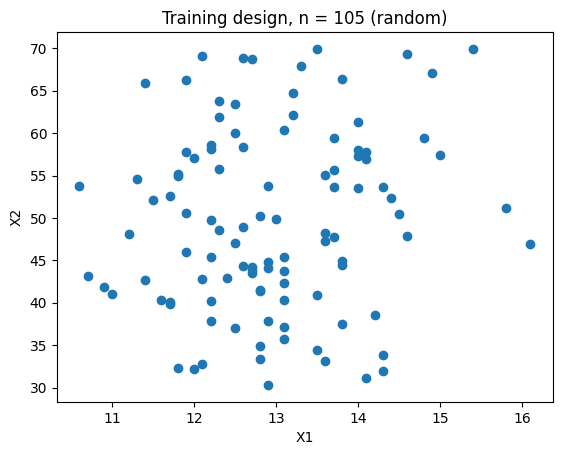

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1252.7758277389173
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1186.000951330898
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1162.4660779162846


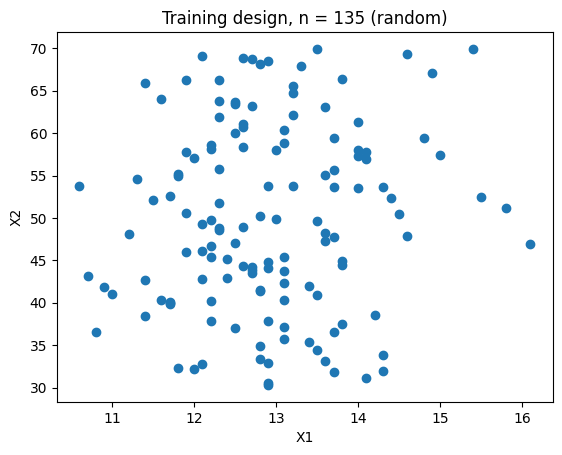

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1163.5289611402675
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1162.163871743761
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1122.0650568963335


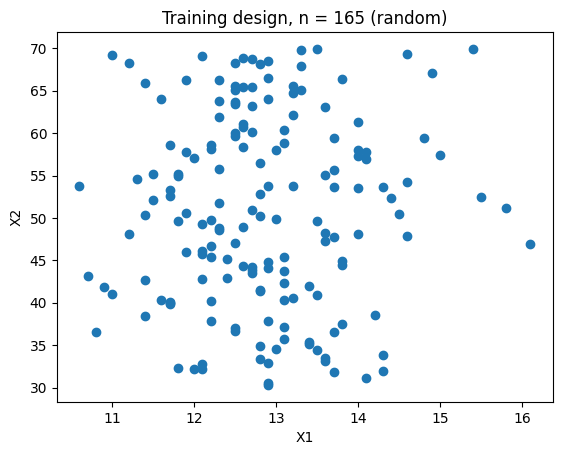

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1134.850578196621
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1138.0616790417396
4
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1581.389133677414


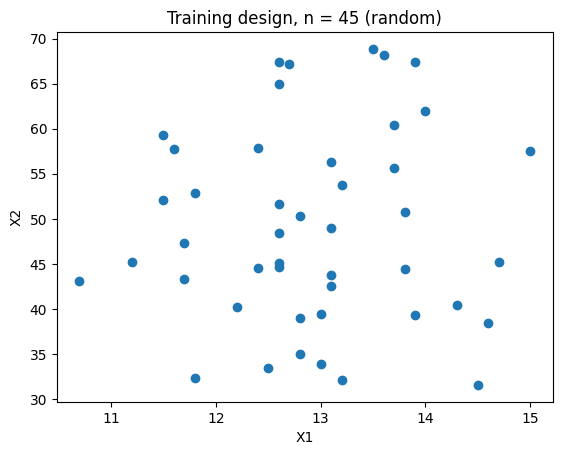

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1262.104858805224
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1210.078092733296
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1182.6877251578494


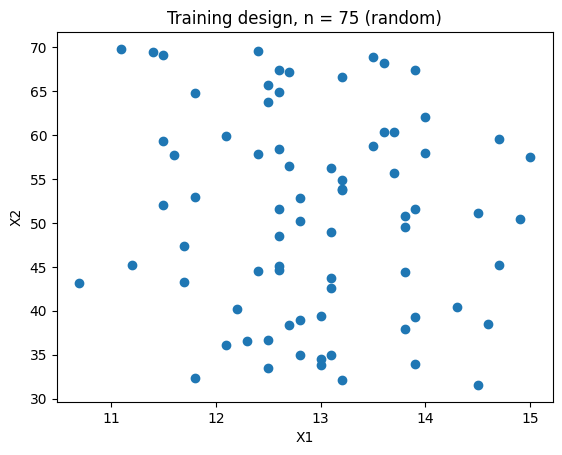

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1154.1571808835126
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1103.0559658742136
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1086.980264474968


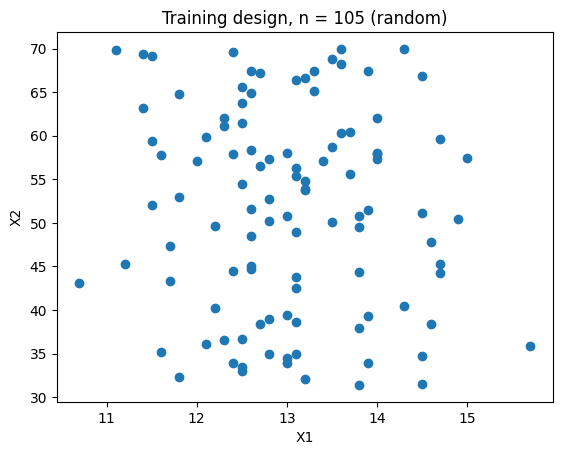

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1095.2009105260431
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1030.8811793155091
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1049.5551203847995


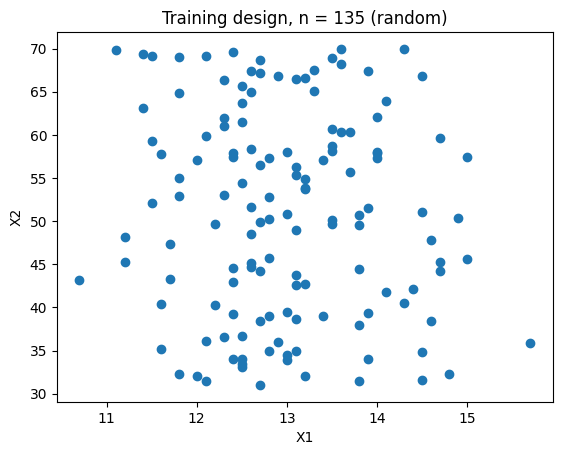

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1038.8057104434415
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1041.9875780114826
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1031.776783531424


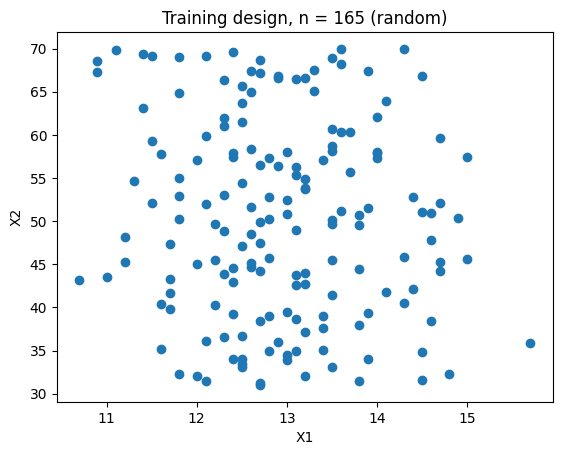

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1008.3832457972212
Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1019.799155781608


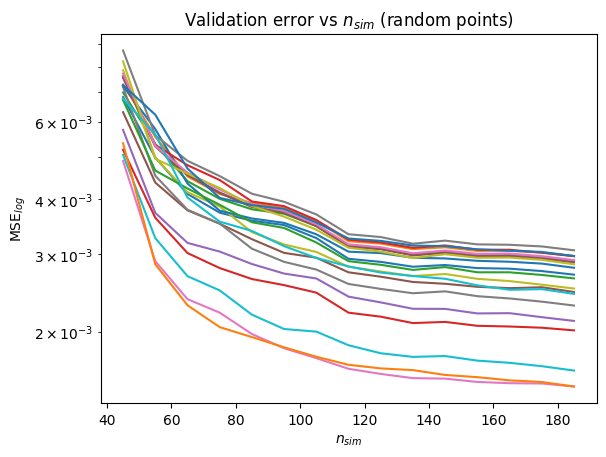

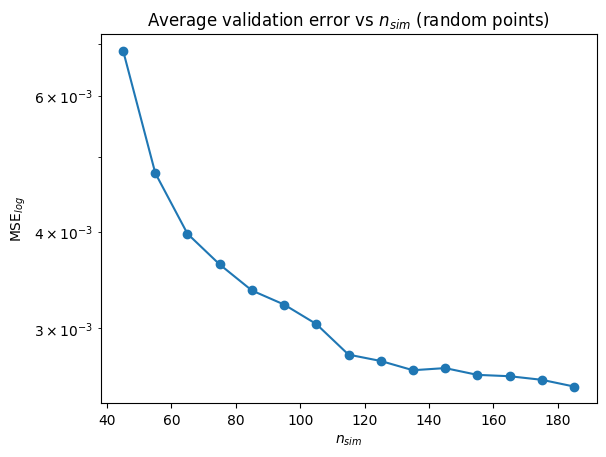

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random

# statistiky chyb pro běhy
errs_stat = []
# nsim
nsim_values = None

for s in range(5):
    print(s)  # číslo běhu
    errs = []  # chyba
    nsim = []  # počet simulací

    base_n = 45          # počáteční počet bodů
    n_steps = 15         # počet kroků adaptace
    increment = 10       # kolik bodů přidám

    all_indices = np.arange(len(Y_all))  # všechny indexy
    initial_indices = random.sample(list(all_indices), base_n)  # náhodný začátek
    remaining_indices = [idx for idx in all_indices if idx not in initial_indices]  # zbytek bodů

    train_indices = list(initial_indices)  # aktuální trénovací indexy

    for k in range(n_steps):
        if k > 0:
            for _ in range(increment):
                if not remaining_indices:
                    break  # když dojdou body
                new_idx = random.choice(remaining_indices)  # náhodně přidám bod
                train_indices.append(new_idx)  # přidání bodu
                remaining_indices.remove(new_idx)  # odeberu ze zbytku

        train_indices_array = np.array(train_indices, dtype=int)  # do numpy pole
        n_current = len(train_indices_array)  # aktuální počet bodů
        nsim.append(n_current)  # uložím si n

        val_indices = np.array(
            [idx for idx in all_indices if idx not in train_indices_array],
            dtype=int
        )  # validační indexy - zbytek

        xx_train = X[train_indices_array, :]      # trénovací vstupy
        yy_train = Y_all[train_indices_array, :]  # trénovací výstupy

        xx_val = X[val_indices, :]           # validační vstupy
        yy_val = Y_all[val_indices, :]       # validační výstupy

        # vytvoření SAPCE modelu
        sapce = SAPCE.SensitivityAdaptivePCE(
            pdf=joint,
            exp_design_in=xx_train,
            exp_design_out=yy_train,
            max_partial_degree=5,
            num_inputs=12,
        )
        sapce.construct_adaptive_basis(max_condition_number=1e3)  # konstrukce báze
        sapce.construct_pruned_pce(cr=1e-8)                       # ořezání PCE

        # validace na všech datech
        errs.append(sapce.pce.validation_error(xx_val, yy_val))

        if k % 3 == 0: # graf vybraných bodů
            fig_vis, ax_vis = plt.subplots()  
            ax_vis.scatter(xx_train[:, 0], xx_train[:, 1]) 
            ax_vis.set_xlabel("X1")  
            ax_vis.set_ylabel("X2")  
            ax_vis.set_title(f"Training design, n = {n_current} (random)")
            plt.show()

    errs_stat.append(errs)  # uložím chyby běhu
    nsim_values = nsim      # uložím nsim z běhu

nsim = nsim_values
errs_stat_array = np.array(errs_stat) 


# Graf 1: jednotlivé simulace (průměr přes běhy)
fig, ax = plt.subplots()  

for i in range(21):
    ax.plot(
        nsim,
        np.mean(errs_stat_array[:, :, 2 + i], axis=0))

ax.set_yscale("log")             
ax.set_ylabel("MSE$_{log}$")   
ax.set_xlabel("$n_{sim}$")       
ax.set_title("Validation error vs $n_{sim}$ (random points)")   
plt.show()  

# Graf 2: pouze průměrná chyba
mean_err_all = np.mean(errs_stat_array[:, :, 2:2 + 21], axis=(0, 2)) 
fig_avg, ax_avg = plt.subplots()  
ax_avg.plot(nsim, mean_err_all, marker="o")  
ax_avg.set_yscale("log")                  
ax_avg.set_ylabel("MSE$_{log}$")          
ax_avg.set_xlabel("$n_{sim}$")           
ax_avg.set_title("Average validation error vs $n_{sim}$ (random points)") 
plt.show()  


nsim_random = nsim.copy()
mean_err_random = mean_err_all.copy()


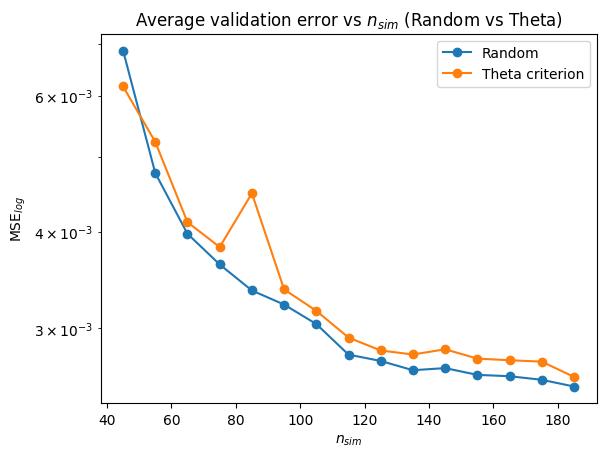

In [11]:

fig, ax = plt.subplots()
ax.plot(nsim_random, mean_err_random, marker="o", label="Random")
ax.plot(nsim_theta,   mean_err_theta,   marker="o", label="Theta criterion")

ax.set_yscale("log")
ax.set_ylabel("MSE$_{log}$")
ax.set_xlabel("$n_{sim}$")
ax.set_title("Average validation error vs $n_{sim}$ (Random vs Theta)")
ax.legend()
plt.show()

In [12]:
sapce.pce.coefficients

array([[ 0.00000000e+00,  2.24428685e-03, -3.89369353e-03,
        -9.52120208e-03, -4.62359029e-03, -6.96067674e-03,
        -3.68354100e-03, -9.18606468e-03, -6.27637935e-03,
        -6.81938818e-04, -9.86338207e-05, -4.50700441e-04,
         3.19486103e-05, -2.96602316e-03, -1.03621181e-02,
        -1.65618243e-02, -2.45021150e-02, -2.87573745e-02,
        -2.51723945e-02, -1.81893767e-02, -1.16276169e-02,
        -3.51985992e-03, -1.51869957e-04],
       [ 0.00000000e+00,  9.49800189e-05,  9.25404260e-04,
         7.59661305e-04,  9.20097392e-04,  6.05313940e-04,
         4.94905747e-04,  3.06833507e-04,  6.96346800e-05,
         1.86218535e-04,  1.93932940e-04,  2.20575991e-04,
        -2.04680029e-04, -7.86166579e-05,  4.54113646e-04,
         7.41997466e-04,  1.10870360e-03,  1.26715797e-03,
         1.02589696e-03,  6.46078619e-04,  3.84203287e-04,
        -1.38447536e-04, -2.24181181e-04],
       [ 0.00000000e+00, -2.49173385e-05,  2.68907380e-05,
         9.80224594e-05,  1.5

In [13]:

# plt.rcParams['axes.linewidth'] = 0.5
# plt.rcParams['text.usetex']=True
# #plt.rc('text.latex', preamble=r'\usepackage[bitstream-charter]{mathdesign}')
# plt.rcParams['font.size'] = 10
# plt.rcParams['xtick.major.width'] = 0.5
# plt.rcParams['ytick.major.width'] = 0.5
# # Times, Palatino, New Century Schoolbook, Bookman, Computer Modern Roman
# plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']}) 

# import matplotlib
# matplotlib.use('pgf')
# plt.rcParams["pgf.texsystem"] = "xelatex"
# plt.rcParams["pgf.rcfonts"] = False

# preamble = r'''\usepackage[utf8]{inputenc} %unicode support
# \usepackage[czech]{babel}
# \usepackage[T1]{fontenc}
# \DeclareMathAlphabet{\pazocal}{OMS}{zplm}{m}{n}
# \usepackage{calrsfs}
# \usepackage{amsmath}
# \usepackage{bm}
# \usepackage[bitstream-charter]{mathdesign}
# '''
# plt.rc('text.latex', preamble=preamble)
# plt.rcParams["pgf.preamble"] = preamble

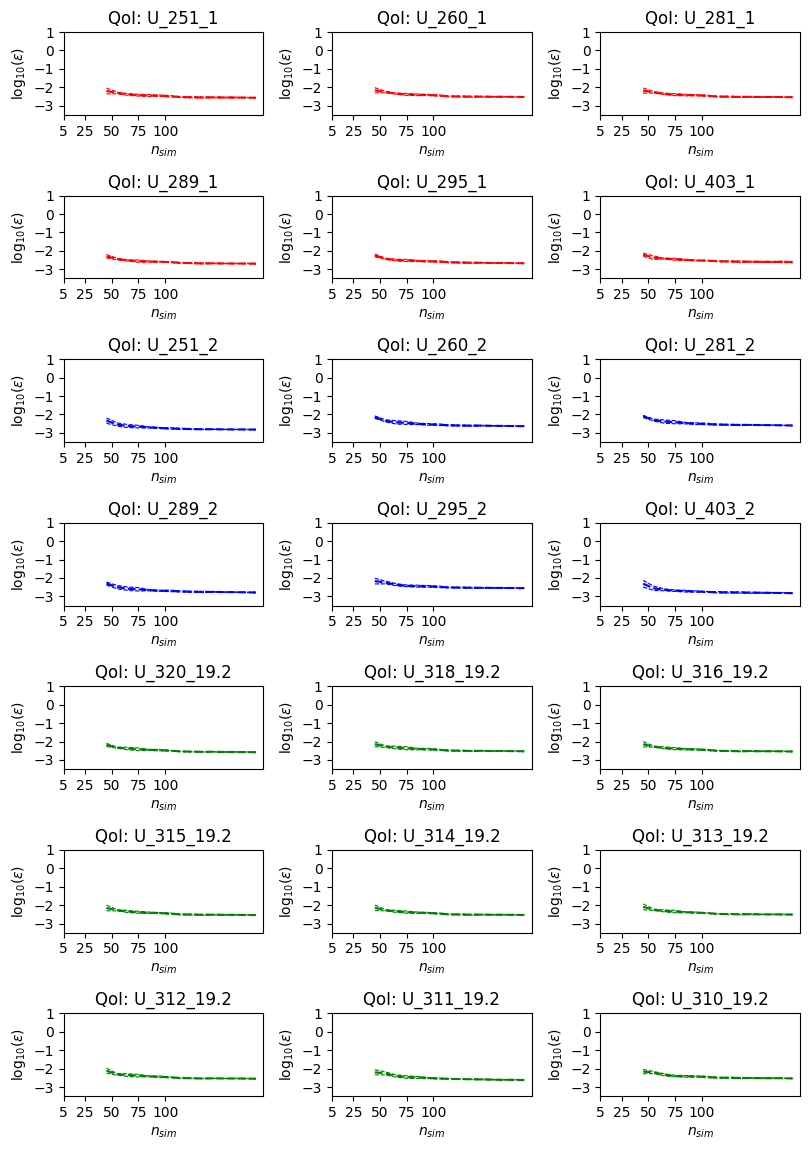

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def logplot(vals):
    vals = np.log10(vals)
    delta = np.std(np.array(vals))
    means = np.mean(np.array(vals))
    maxy = means + delta
    miny = means - delta
    if means < -10:
        means = -10
        maxy = -10
        miny = -10
    return means, maxy, miny

sims = len(nsim)
fig, axis = plt.subplots(7, 3, figsize=(8.2, 11.6))

j = 0
for ax in axis.flatten():
    means = np.zeros(sims)
    maxs = np.zeros(sims)
    mins = np.zeros(sims)
    for i in range(sims):
        means[i], maxs[i], mins[i] = logplot(errs_stat_array[:, i, j+2])
    ax.set_title('QoI: {}'.format(names[12+j]))
    ax.set_ylim(-3.5, 1)
    if j < 6:
        color = 'red'
        color_hex = (1, 0, 0, 0.1)
    elif j < 12:
        color = 'blue'
        color_hex = (0, 0, 1, 0.1)
    else:
        color = 'green'
        color_hex = (0, 1, 0, 0.1)
    ax.plot(nsim, means, '--', c=color)
    ax.plot(nsim, mins, '--', c=color, linewidth=0.8)
    ax.plot(nsim, maxs, '--', c=color, linewidth=0.8)
    ax.fill_between(nsim, mins, maxs, facecolor=color_hex)
    j += 1

j = 0
for ax in axis.flatten():
    ax.set_yticks([1, 0, -1, -2, -3])
    ax.set_ylabel('log$_{10}$($\\epsilon$)')
    ax.set_xticks([5, 25, 50, 75, 100])
    ax.set_xlabel('$n_{sim}$')
    j += 1

fig.tight_layout()


In [15]:
names[12+j]

'U_308_19.2'

In [16]:
nsim.append(200)

rand_indices=random.sample(range(len(Y_all)), nsim[-1])
xx_train=X[rand_indices,:]
yy_train=Y_all[rand_indices,:]

xx_val=np.delete(X, rand_indices)
yy_val=np.delete(Y_all, rand_indices)


sapce = SAPCE.SensitivityAdaptivePCE(pdf=joint, exp_design_in=xx_train, exp_design_out=yy_train, max_partial_degree=10, num_inputs=12)
sapce.construct_adaptive_basis(max_condition_number=1e4)
sapce.construct_pruned_pce(cr=1e-8)

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 19118.316180927213


VYKRESLENI SOBOLA

In [18]:
nodes = np.array([
    (0, -10.5275), (0.492, -10.5395), (0.983, -10.5755), (1.4719, -10.6353),
    (1.95708, -10.719), (2.43761, -10.8261), (2.91235, -10.9566), (3.38016, -11.1101),
    (3.83994, -11.2861), (4.29059, -11.4844), (4.73104, -11.7044), (5.16024, -11.9456),
    (5.57717, -12.2075), (6.00215, -12.505), (6.41129, -12.824), (6.80351, -13.1636),
    (7.17776, -13.5229), (7.53, -13.901), (7.87, -14.2968), (8.18, -14.7093),
    (8.48, -15.1374), (8.74685, -15.58), (8.97931, -16.0164), (9.18182, -16.4675),
    (9.35346, -16.9312), (9.49344, -17.4055), (9.60113, -17.8881), (9.67604, -18.3768),
    (9.71783, -18.8695), (9.7263, -19.3639), (9.70142, -19.8578), (9.64331, -20.3488),
    (9.55222, -20.8348), (9.42857, -21.3136), (9.27246, -21.7842), (9.08488, -22.2431),
    (8.86671, -22.6884), (8.61894, -23.1179), (8.34143, -23.5199), (8.02741, -23.8942),
    (7.67966, -24.2374), (7.30124, -24.5464), (6.89548, -24.8185), (6.46599, -25.0513),
    (6.01653, -25.2428), (5.55109, -25.3913), (5.07787, -25.5123), (4.60202, -25.6225),
    (4.12377, -25.7219), (3.6434, -25.8104), (3.16338, -25.8875), (2.68174, -25.9538),
    (2.19873, -26.0091), (1.71458, -26.0534), (1.22955, -26.0868), (0.744, -26.1092),
    (0.258, -26.1205), (-0.228, -26.1209), (-0.714, -26.1102), (-1.20007, -26.0885),
    (-1.68514, -26.0558), (-2.16935, -26.0121), (-2.65244, -25.9574), (-3.13417, -25.8919),
    (-3.61429, -25.8154), (-4.10204, -25.7262), (-4.58759, -25.6257), (-5.07, -25.5141),
    (-5.55, -25.3913), (-6.01653, -25.2428), (-6.47, -25.0513), (-6.90, -24.8185),
    (-7.30124, -24.5464), (-7.67966, -24.2374), (-8.02741, -23.8942), (-8.34143, -23.5199),
    (-8.61894, -23.1179), (-8.86671, -22.6884), (-9.08488, -22.2431), (-9.27246, -21.7842),
    (-9.42857, -21.3136), (-9.55222, -20.8348), (-9.64331, -20.3488), (-9.70142, -19.8578),
    (-9.7263, -19.3639), (-9.71783, -18.8695), (-9.67604, -18.3768), (-9.60113, -17.8881),
    (-9.49344, -17.4055), (-9.35346, -16.9312), (-9.18182, -16.4675), (-8.97931, -16.0164),
    (-8.74685, -15.58), (-8.47618, -15.1374), (-8.18314, -14.7093), (-7.86849, -14.2968),
    (-7.53307, -13.901), (-7.17776, -13.5229), (-6.80351, -13.1636), (-6.41129, -12.824),
    (-6.00215, -12.505), (-5.57717, -12.2075), (-5.16024, -11.9456), (-4.73104, -11.7044),
    (-4.29059, -11.4844), (-3.83994, -11.2861), (-3.38016, -11.1101), (-2.91235, -10.9566),
    (-2.43761, -10.8261), (-1.95708, -10.719), (-1.4719, -10.6353), (-0.983, -10.5755),
    (-0.492, -10.5395)
])

Adaptive basis construction terminated: design matrix not sufficiently well-conditioned: 1005.01380041524
mean_file_M:
[   4926.04353239    4824.23975058    5838.1168796     8640.80622511   14184.81997024   23597.9692595    38068.165311     58700.266412     86186.840039    120329.296957    158575.90431
  193979.35027     202457.28854     165223.32439     103454.534034     47213.9188        8249.0121735   -13624.3717993   -25059.336064    -33803.011427    -46214.445485    -61981.64082
  -75055.478682    -82582.929194    -84449.918899    -80164.70184     -69081.40042     -50762.049448    -25280.780792      7127.6355098    45446.125589     85842.176435    105575.75207
   79944.981482     33768.838949     -5088.7454944   -40937.508671    -73171.062605    -95626.167025   -107417.345443   -111015.398636   -104373.309214    -83654.237127    -46346.77372
    9530.76262022   74742.744969    129391.803474    163386.01082     173121.87691     151139.785516    111092.405119     72955.038543     39

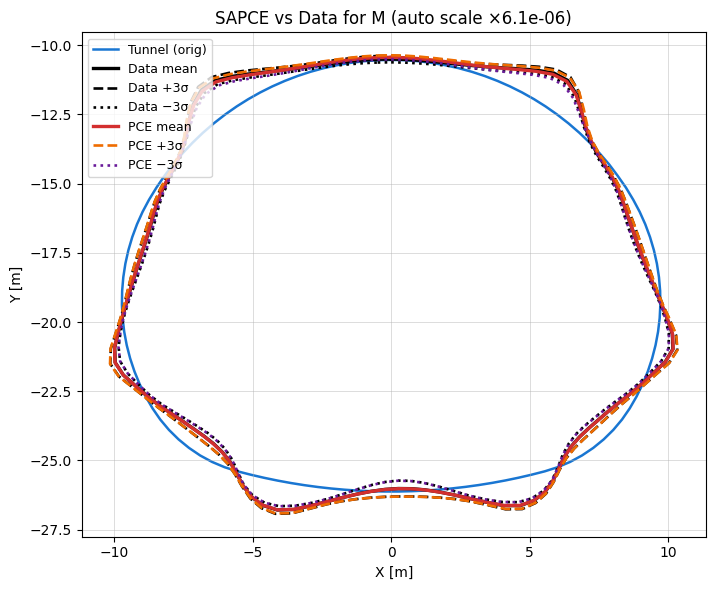

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Settings
TARGET_RATIO_LEFT = 0.14
COL_TUNNEL = "#1976d2"
COL_DATA = "#000000"
COL_PCE_MEAN = "#d32f2f"
COL_PCE_P3 = "#ef6c00"
COL_PCE_M3 = "#6a1b9a"
VALUE_SCALE = 1.0

# Helpers
def _print_full(name, arr):
    with np.printoptions(threshold=np.inf, linewidth=200):
        print(f"{name}:\n{arr}\n")

def _ensure_xy(nodes):
    arr = np.asarray(nodes, dtype=float)
    if arr.ndim != 2 or arr.shape[1] < 2:
        raise RuntimeError("'nodes' must have shape (m,2) or (m,3).")
    return arr[:, :2]

def _close_curve(ax, xy, **kw):
    ax.plot(xy[:, 0], xy[:, 1], **kw)
    ax.plot([xy[-1, 0], xy[0, 0]], [xy[-1, 1], xy[0, 1]], **kw)

def _deform_nodes_radially(nodes_xy, deltas, center_xy):
    out = np.zeros_like(nodes_xy)
    for i in range(len(nodes_xy)):
        v = nodes_xy[i] - center_xy
        n = np.linalg.norm(v)
        out[i] = nodes_xy[i] + (deltas[i] * (v / n) if n > 0 else 0.0)
    return out

def _auto_deform_scale(nodes_xy, series_list, target_ratio=0.14, eps=1e-12):
    radii = np.linalg.norm(nodes_xy - nodes_xy.mean(axis=0), axis=1)
    R = float(np.mean(radii))
    max_abs = max(float(np.max(np.abs(s[:len(nodes_xy)]))) for s in series_list)
    if max_abs < eps or R < eps:
        return 1.0
    return (target_ratio * R) / max_abs

# Build M stats
required_total = 339
n_block = 113

if 'Y_all_NVM' not in globals():
    raise RuntimeError("Y_all_NVM is not defined. Run the earlier data-prep cells first.")
if Y_all_NVM.shape[1] < required_total:
    raise RuntimeError(f"Y_all_NVM has only {Y_all_NVM.shape[1]} outputs; need at least {required_total}.")

Y_M = Y_all_NVM[:, 2*n_block:3*n_block]
mean_M = np.mean(Y_M, axis=0)
std_M = np.std(Y_M, axis=0, ddof=0)

need_new_pce = False
try:
    pcemean_all, pcevar_all = sapce.pce.get_moments()
    if pcemean_all.shape[0] < required_total:
        need_new_pce = True
except Exception:
    need_new_pce = True

if need_new_pce:
    if 'SAPCE' not in globals():
        import SAPCE
    if 'xx_train' in globals() and 'yy_train' in globals() and yy_train.shape[1] >= required_total:
        exp_in = xx_train
        exp_out = yy_train[:, :required_total]
    else:
        if 'X' not in globals():
            raise RuntimeError("X is not defined; cannot build a temporary SAPCE model. Run earlier cells to define X.")
        exp_in = X
        exp_out = Y_all_NVM[:, :required_total]
    num_inputs = exp_in.shape[1] if hasattr(exp_in, 'shape') else 12
    if 'joint' not in globals():
        raise RuntimeError("PDF 'joint' is not defined. Run earlier cells that construct the joint distribution.")
    sapce_339 = SAPCE.SensitivityAdaptivePCE(pdf=joint,
                                             exp_design_in=exp_in,
                                             exp_design_out=exp_out,
                                             max_partial_degree=10,
                                             num_inputs=num_inputs)
    sapce_339.construct_adaptive_basis(max_condition_number=1e3)
    sapce_339.construct_pruned_pce(cr=1e-8)
    pcemean_all, pcevar_all = sapce_339.pce.get_moments()

pcemean_339 = pcemean_all[:required_total]
pcesd_339 = np.sqrt(pcevar_all[:required_total])
pcemean_M = pcemean_339[2*n_block:3*n_block]
pcesd_M = pcesd_339[2*n_block:3*n_block]

_df_M = pd.DataFrame({
    "point": np.arange(1, n_block+1),
    "mean_file": mean_M,
    "std_file": std_M,
    "mean_sapce": pcemean_M,
    "std_sapce": pcesd_M,
})
_print_full("mean_file_M", mean_M)
_print_full("std_file_M", std_M)
_print_full("mean_sapce_M", pcemean_M)
_print_full("std_sapce_M", pcesd_M)

# Full profile plot
def plot_profile_M(df_stats, nodes, value_scale=1.0, target_ratio_left=0.14):
    nodes_xy = _ensure_xy(nodes)
    m = min(len(nodes_xy), len(df_stats))
    nodes_xy = nodes_xy[:m]
    center = nodes_xy.mean(axis=0)
    data_mean = df_stats["mean_file"].to_numpy()[:m] * value_scale
    data_std = df_stats["std_file"].to_numpy()[:m] * value_scale
    pce_mean = df_stats["mean_sapce"].to_numpy()[:m] * value_scale
    pce_std = df_stats["std_sapce"].to_numpy()[:m] * value_scale
    scale_left = _auto_deform_scale(nodes_xy, [data_mean, pce_mean], target_ratio=target_ratio_left)
    data_mean_xy = _deform_nodes_radially(nodes_xy, scale_left * data_mean, center)
    data_plus3_xy = _deform_nodes_radially(nodes_xy, scale_left * (data_mean + 3*data_std), center)
    data_minus3_xy = _deform_nodes_radially(nodes_xy, scale_left * (data_mean - 3*data_std), center)
    pce_mean_xy = _deform_nodes_radially(nodes_xy, scale_left * pce_mean, center)
    pce_plus3_xy = _deform_nodes_radially(nodes_xy, scale_left * (pce_mean + 3*pce_std), center)
    pce_minus3_xy = _deform_nodes_radially(nodes_xy, scale_left * (pce_mean - 3*pce_std), center)
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    _close_curve(ax, nodes_xy, color=COL_TUNNEL, linewidth=1.8, label="Tunnel (orig)", zorder=1)
    _close_curve(ax, data_mean_xy, color=COL_DATA, linestyle="-", linewidth=2.4, label="Data mean", zorder=2)
    _close_curve(ax, data_plus3_xy, color=COL_DATA, linestyle="--", linewidth=1.9, label="Data +3σ", zorder=2)
    _close_curve(ax, data_minus3_xy, color=COL_DATA, linestyle=":", linewidth=1.9, label="Data −3σ", zorder=2)
    _close_curve(ax, pce_mean_xy, color=COL_PCE_MEAN, linestyle="-", linewidth=2.4, label="PCE mean", zorder=3)
    _close_curve(ax, pce_plus3_xy, color=COL_PCE_P3, linestyle="--", linewidth=1.9, label="PCE +3σ", zorder=3)
    _close_curve(ax, pce_minus3_xy, color=COL_PCE_M3, linestyle=":", linewidth=1.9, label="PCE −3σ", zorder=3)
    ax.set_xlabel("X [m]")
    ax.set_ylabel("Y [m]")
    ax.set_title(f"SAPCE vs Data for M (auto scale ×{scale_left:.3g})")
    ax.set_aspect("equal", "box")
    ax.grid(True, linewidth=0.6, alpha=0.5)
    handles, labels = ax.get_legend_handles_labels()
    uniq = {}
    for h, l in zip(handles, labels):
        if l and l not in uniq:
            uniq[l] = h
    if uniq:
        ax.legend(uniq.values(), uniq.keys(), loc="upper left", fontsize=9, frameon=True)
    fig.tight_layout()
    plt.show()

# Run plot
if 'nodes' not in globals():
    raise RuntimeError("Variable 'nodes' is not defined. It must have shape (m,2) or (m,3).")

plot_profile_M(_df_M, nodes, value_scale=VALUE_SCALE, target_ratio_left=TARGET_RATIO_LEFT)
